In [7]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Trainability

## 1D function

### Generate Data

In [8]:
np.random.seed(42)
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.3, 0.02) - gaussian(x, 0.7, 0.02) 

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)
print(y.shape)

(100, 1)


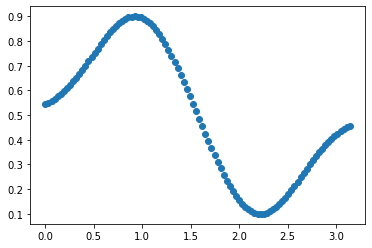

In [9]:
plt.plot(x, y, 'o')
plt.show()

### Training Models

In [10]:
backend = Aer.get_backend('qasm_simulator')

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(1):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D"))

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.10084475780868805
epoch: 1, loss: 0.08734605252646391
epoch: 2, loss: 0.0795845560960568
epoch: 3, loss: 0.07326635040756674
epoch: 4, loss: 0.0677054755875589
epoch: 5, loss: 0.06115903802869694
epoch: 6, loss: 0.056056113421978464
epoch: 7, loss: 0.05156802960004372
epoch: 8, loss: 0.04896198719148796
epoch: 9, loss: 0.046264479850047106
epoch: 10, loss: 0.04483441695426045
epoch: 11, loss: 0.04489993196626081
epoch: 12, loss: 0.04455406178542406
epoch: 13, loss: 0.043291576020493855
epoch: 14, loss: 0.04029574883794548


In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(1):
    dnn = sequential_dnn(dim = [1, 3, 1],
                         lr = 0.1)
    
    dnn.train(x, y, epochs=5000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D"))

## 2D function

### Generate Data

In [2]:
np.random.seed(42)

n = 10
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.25, 0.75]])
var1 = np.array([[0.02, 0], [0, 0.02]])

mean2 = np.array([[0.75, 0.25]])
var2 = np.array([[0.02, 0], [0, 0.02]])

mean3 = np.array([[0.25, 0.25]])
var3 = np.array([[0.02, 0], [0, 0.02]])

mean4 = np.array([[0.75, 0.75]])
var4 = np.array([[0.02, 0], [0, 0.02]])

y = gaussian(x, mean1, var1) + gaussian(x, mean2, var2) - gaussian(x, mean3, var3) - gaussian(x, mean4, var4)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)

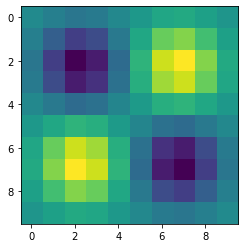

In [3]:
plt.imshow(y.reshape(n,n))
plt.show()

### Training Models

In [6]:
np.random.seed(42)

qnn_list = []
for i in range(1):
    qnn = sequential_qnn(q_bits = [2, 4],
                         dim = [2, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D"))

  0%|          | 0/100 [00:00<?, ?it/s]

            ┌───────┐      ┌────────────┐┌─┐   
 storage_0: ┤ RY(0) ├──■───┤ RY(2.3533) ├┤M├───
            ├───────┤┌─┴─┐┌┴────────────┤└╥┘┌─┐
 storage_1: ┤ RY(0) ├┤ X ├┤ RY(0.98029) ├─╫─┤M├
            └───────┘└───┘└─────────────┘ ║ └╥┘
clas_reg: 2/══════════════════════════════╩══╩═
                                          0  1 


NameError: name 'exit' is not defined

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(1):
    dnn = sequential_dnn(dim = [2, 3, 1],
                     lr = 0.1)
    
    dnn.train(x, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D"))

In [ ]:
ost1 = loader(data_path("trainability_qnn_2D"))
ost2 = loader(data_path("trainability_dnn_2D"))

In [ ]:
y_pred1 = ost1[0].predict(x)
y_pred2 = ost2[0].predict(x)

In [ ]:
plt.plot(ost1[0].loss)
plt.plot(ost2[0].loss)

In [ ]:
print(r2(y_pred1, y), r2(y_pred2, y))

In [ ]:
plt.imshow(y_pred1.reshape(20,20))
plt.show()

plt.imshow(y_pred2.reshape(20,20))
plt.show()

## 3D function

### Generate Data

In [ ]:
np.random.seed(42)

n = 8
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x,x])
y = random_mixed_gaussian(x, n_gaussians=10)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)